In [2]:
import urllib.request
from html.parser import HTMLParser
from urllib.parse import urlparse
from parsel import Selector
from bs4 import BeautifulSoup
import queue
import nltk
import spacy
import os
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
import matplotlib.pylab as plt
from tqdm import tqdm
from nltk.stem.snowball import PorterStemmer,SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib as mp
%matplotlib inline

# Read Me
For proper formation of graph we have taken nearly 5500 nodes.<br> 
We have shown the graph for top 100 domains 





# Implementing  a web crawler for World Wide Web

In [274]:
class MyHTMLParser(HTMLParser):
    def handle_data(self, data):
        if data.strip()!="":
            print(data)
parser = MyHTMLParser()

Fetching webpage using URL based libraries

In [ ]:
with urllib.request.urlopen('https://en.wikipedia.org/wiki/Link_analysis') as response
    html = response.read()
selector = Selector(text=html.decode("utf-8") )
pol = selector.css('body').get()
class MyHTMLParser(HTMLParser):
    def handle_data(self, data):
        if data.strip()!="":
            print(data)
parser = MyHTMLParser()
parser.feed(pol.replace("\\n",""))


Functions to fetch urls from the webpage

In [275]:
def getDataFromUrl(url):
    with urllib.request.urlopen(url) as response:
        html = response.read()
    return html
def getSelector(html):
    selector = Selector(text=html.decode("utf-8"))
    return selector
def getBody(selector):
    pol = selector.css('body').get()
    return pol
def getUrls(selector):
    urls = selector.xpath('//a/@href').getall()
    return urls
def processQueueElement(url):
    parsedUrl = urlparse(url)
    try:
        data = getDataFromUrl(url)
        selector = getSelector(data)
        body = getBody(selector)
        urls = getUrls(selector)
    except:
        return []
    
    for idx,i in enumerate(urls):
        if i.startswith("/"):
            urls[idx] = parsedUrl.scheme+'://'+parsedUrl.netloc+i
#             print(urls[idx])
    return urls



# Seed URL

In [276]:
links = ['https://www.tutorialspoint.com/data_structures_algorithms/algorithms_basics.htm', 
         'https://www.tutorialspoint.com/data_structures_algorithms/dynamic_programming.htm',
         'http://mlwiki.org/index.php/Information_Retrieval', 
         'https://www.imageclef.org/2010/wiki',
         'https://www.tutorialspoint.com/data_structures_algorithms/linked_list_algorithms.htm',
       ]
    
linkID = {}

network = []
vis = set()

outDeg = {}
inDeg = {}

idNum = 1

for link in links:
    linkID[link] = idNum
    idNum += 1    

In [277]:
print(linkID)

{'https://www.tutorialspoint.com/data_structures_algorithms/algorithms_basics.htm': 1, 'https://www.tutorialspoint.com/data_structures_algorithms/dynamic_programming.htm': 2, 'http://mlwiki.org/index.php/Information_Retrieval': 3, 'https://www.imageclef.org/2010/wiki': 4, 'https://www.tutorialspoint.com/data_structures_algorithms/linked_list_algorithms.htm': 5}


# Mercator URL frontier and storing the URLs as Graph 

In [278]:
######## Mercator url frontier code ##########3
def getDomain(url):  #get domain function
    try:
        return url.split('//')[1].split('/')[0]
    except:
        return -1
    
def createLevel():     #create the next level of graph using previously fetch nodes. with implementation of mercator url frontier
    
    from time import time
    
    lastUsed = dict()
    pending = dict()
    
    idNum = len(linkID) + 1
    
    frontierQ = queue.Queue(0)
    
    links = list(linkID.keys())
    print(len(links))
    
    for link in links:
        domain = getDomain(link)
        
        if domain == -1:
            continue
        
        frontierQ.put(link)
        
        if domain not in pending.keys():
            pending[domain] = 1
        else:
            pending[domain] += 1
    
    while frontierQ.qsize() > 0:
        
        link = frontierQ.get()
        domain = getDomain(link)
        if domain == -1:
            continue
            
        flag = 1
        curTime = time()
        if domain in lastUsed.keys() and curTime - lastUsed[domain] <= 2.0 and pending[domain]-1 != frontierQ.qsize():
            frontierQ.put(link)
            continue
        
        if domain in pending.keys():
            pending[domain] -= 1
        
        if linkID[link] in vis:
            continue
        vis.add(linkID[link])
        
        urls = processQueueElement(link)
        lastUsed[domain] = time()
        
        for nextLink in urls:
            if nextLink not in linkID.keys():
                linkID[nextLink] = idNum
                idNum += 1
            
            domain = getDomain(nextLink)
        
            if domain == -1:
                continue

            if domain not in pending.keys():
                if len(pending) < 4:
                    pending[domain] = 1
            else:
                pending[domain] += 1
            
            print(linkID[link], linkID[nextLink])
            
            if (linkID[link], linkID[nextLink]) not in network:
                network.append((linkID[link], linkID[nextLink]))
            
            if linkID[nextLink] in inDeg.keys():
                inDeg[linkID[nextLink]] += 1
            else:
                inDeg[linkID[nextLink]] = 1
            
            if linkID[link] in outDeg.keys():
                outDeg[linkID[link]] += 1
            else:
                outDeg[linkID[link]] = 1
            
createLevel()
network

5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 6
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 11
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 11
1 46
1 47
1 48
1 49
1 50
1 52
1 53
1 54
1 55
1 56
1 53
1 54
1 56
1 57
1 58
1 59
1 1
1 60
1 61
1 62
1 2
1 63
1 64
1 5
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 11
1 97
1 50
1 98
1 99
1 100
1 101
1 59
1 60
1 59
1 60
1 6
1 103
1 104
1 105
1 106
1 107
1 108
3 109
3 109
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 126
3 127
3 127
3 128
3 127
3 129
3 128
3 130
3 131
3 132
3 133
3 134
3 135
3 136
3 137
3 138
3 139
3 131
3 140
3 115
3 141
3 142
3 143
3 144
3 145
3 146
3 147
3 148
3 149
3 150
3 151
3 152
4 154
4 155
4 156
4 157
4 158
4 159
4 160
4 161
4 162
4 163
4 164
4 165
4 166
4 167
4 168
4 169
4 170
4 171
4 172
4 173
4 174
4 175
4 176
4 177
4 178
4 179
4 180
4 181


[(1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (1, 52),
 (1, 53),
 (1, 54),
 (1, 55),
 (1, 56),
 (1, 57),
 (1, 58),
 (1, 59),
 (1, 1),
 (1, 60),
 (1, 61),
 (1, 62),
 (1, 2),
 (1, 63),
 (1, 64),
 (1, 5),
 (1, 65),
 (1, 66),
 (1, 67),
 (1, 68),
 (1, 69),
 (1, 70),
 (1, 71),
 (1, 72),
 (1, 73),
 (1, 74),
 (1, 75),
 (1, 76),
 (1, 77),
 (1, 78),
 (1, 79),
 (1, 80),
 (1, 81),
 (1, 82),
 (1, 83),
 (1, 84),
 (1, 85),
 (1, 86),
 (1, 87),
 (1, 88),
 (1, 89),
 (1, 90),
 (1, 91),
 (1, 92),
 (1, 93),
 (1, 94),
 (1, 95),
 (1, 96),
 (1, 97),
 (1, 98),
 (1, 99),
 (1, 100),
 (1, 101),
 (1, 103),
 (1, 104),
 (1

In [279]:
# createLeve?l()
createLevel()
print(len(linkID), len(network))

210
6 6
6 7
6 55
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 6
6 53
6 54
6 56
6 29
6 211
6 212
6 213
6 214
6 215
6 216
6 15
6 217
6 218
6 219
6 220
6 221
6 222
6 223
6 224
6 219
6 225
6 219
6 226
6 219
6 227
6 221
6 228
6 221
6 53
6 229
6 230
6 231
6 232
6 233
6 234
6 30
6 235
6 236
6 237
6 238
6 239
6 240
6 31
6 241
6 242
6 243
6 57
6 244
6 245
6 23
6 246
6 247
6 248
6 249
6 250
6 251
6 46
6 252
6 253
6 254
6 255
6 256
6 257
6 22
6 254
6 258
6 259
6 260
6 261
6 262
6 38
6 263
6 264
6 265
6 266
6 267
6 268
6 37
6 269
6 270
6 271
6 272
6 251
6 273
6 24
6 274
6 275
6 276
6 277
6 278
6 279
6 35
6 280
6 281
6 282
6 283
6 284
6 285
6 21
6 53
6 9
6 286
6 97
6 98
6 100
6 101
6 50
6 49
6 287
6 288
6 289
6 103
6 290
6 7
6 105
6 291
6 104
6 8
6 292
6 293
6 14
6 294
6 295
6 16
6 296
6 297
6 298
6 19
6 6
6 299
6 106
6 107
6 108
15 300
15 301
15 302
15 303
15 324
15 302
15 303
15 325
15 326
15 327
15 328
16 335
16 336
16 337
16 338
16 339
16 340
16 341
16 342
16 343
16 344
16 345
16 346
16 336
16 347
16 348

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



66 6
66 7
66 8
66 9
66 10
66 11
66 12
66 13
66 14
66 15
66 16
66 17
66 18
66 19
66 6
66 20
66 21
66 22
66 23
66 24
66 25
66 26
66 27
66 11
66 28
66 29
66 30
66 31
66 32
66 33
66 34
66 35
66 36
66 37
66 38
66 39
66 40
66 41
66 42
66 43
66 44
66 45
66 11
66 46
66 47
66 48
66 49
66 50
66 52
66 53
66 54
66 55
66 56
66 53
66 54
66 56
66 57
66 58
66 59
66 1
66 60
66 61
66 62
66 2
66 63
66 64
66 5
66 65
66 66
66 67
66 68
66 69
66 70
66 71
66 72
66 73
66 74
66 75
66 76
66 77
66 78
66 79
66 80
66 81
66 82
66 83
66 84
66 85
66 86
66 87
66 88
66 89
66 90
66 91
66 92
66 93
66 94
66 95
66 96
66 11
66 97
66 50
66 98
66 99
66 100
66 101
66 65
66 67
66 3952
66 65
66 67
66 6
66 103
66 104
66 105
66 106
66 107
66 108
71 6
71 7
71 8
71 9
71 10
71 11
71 12
71 13
71 14
71 15
71 16
71 17
71 18
71 19
71 6
71 20
71 21
71 22
71 23
71 24
71 25
71 26
71 27
71 11
71 28
71 29
71 30
71 31
71 32
71 33
71 34
71 35
71 36
71 37
71 38
71 39
71 40
71 41
71 42
71 43
71 44
71 45
71 11
71 46
71 47
71 48
71 49
71 50
71 52
71

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 86
84 87
84 88
84 89
84 90
84 91
84 92
84 93
84 94
84 95
84 96
84 11
84 97
84 50
84 98
84 99
84 100
84 101
84 83
84 85
84 3959
84 83
84 85
84 6
84 103
84 104
84 105
84 106
84 107
84 108
100 7
100 13
100 14
100 8
100 1923
100 16
100 1924
100 17
100 18
100 19
100 55
100 1929
100 5358
100 5359
100 5360
100 5361
100 5362
100 5363
100 5364
100 5365
100 5366
100 5367
100 5368
100 5369
100 5370
100 5371
100 5372
100 5373
100 5374
100 5375
100 5376
100 5377
100 5378
100 5379
100 5380
100 5381
100 5382
100 5383
100 5384
100 5385
100 5386
100 5387
100 5388
100 5389
100 5390
100 5391
100 5392
100 5393
100 5394
100 5395
100 5396
100 5397
100 5398
100 5399
100 5400
100 5401
100 5402
100 5403
100 5404
100 5405
100 5406
100 5407
100 5408
100 5409
100 5410
100 5411
100 5412
100 5413
100 5414
100 5415
100 5416
100 5417
100 5418
100 5419
100 5420
100 5421
100 5422
100 5423
100 5424
100 5425
100 5426
100 5427
100 5428
100 5429
100 5430
100 5431
100 5432
100 5433
100 5434
100 5435
100 5436
100 5437
100 5

In [280]:
len(network)

15171

In [281]:
len(linkID)

5518

In [282]:
networkFile = pd.DataFrame(network, columns = ['Node from', 'Node To'])
networkFile.head(15)

Node from  Node To
0           1        6
1           1        7
2           1        8
3           1        9
4           1       10
5           1       11
6           1       12
7           1       13
8           1       14
9           1       15
10          1       16
11          1       17
12          1       18
13          1       19
14          1       20

storing the network file to pc

In [283]:
networkFile.to_csv('C:/Users/babbe/Desktop/networkFile.csv')

In [284]:
reverseMapping = {}

for (link, id) in linkID.items():
    reverseMapping[id] = link



# Retrieving  100 documents 

In [ ]:
corpora = []
corporaLinks = random.sample(list(np.unique(networkFile['Node from'])), 100)

for i in range(len(corporaLinks)):
    corporaLinks[i] = reverseMapping[corporaLinks[i]]
    
corporaLinks

### Fetching Data from the links

In [286]:
class MyHTMLTextParser(HTMLParser):
    text = ""
    def handle_data(self, data):
        if data.strip()!="":
            self.text += data + " "


def collectTextDataFunction(url):
#     try:
    parser = MyHTMLTextParser()
    parsedUrl = urlparse(url)
    data = getDataFromUrl(url)
    selector = getSelector(data)
    body = getBody(selector)
    parser.feed(body.replace("\\n",""))
#     except:
    return parser.text

In [287]:
for x in corporaLinks:
    print(x, collectTextDataFunction(x))
    corpora.append(collectTextDataFunction(x))

http://mlwiki.org/index.php/Special:UserLogin ML Wiki Home  Page Info Special pages Printable version Log in Log in 
					Username				 
					Password				 
							Keep me logged in Help with logging in Forgot your password? 
Retrieved from " http://mlwiki.org/index.php/Special:UserLogin " 2012 – 2019 by 
             Alexey Grigorev 
            Powered by  MediaWiki . 
             TyrianMediawiki Skin , 
            with  Tyrian  design by  Gentoo . Privacy policy About ML Wiki Disclaimers if(window.jQuery)jQuery.ready(); if(window.mw){
mw.loader.state({"skins.tyrian-mediawiki":"loading"});
} if(window.mw){
document.write("\u003Cscript src=\"http://mlwiki.org/load.php?debug=false\u0026amp;lang=en\u0026amp;modules=skins.tyrian-mediawiki\u0026amp;only=scripts\u0026amp;skin=tyrian-mediawiki\u0026amp;*\"\u003E\u003C/script\u003E");
} if(window.mw){
mw.loader.load(["mediawiki.special.userlogin.common.js","mediawiki.user","mediawiki.hidpi","mediawiki.page.ready","mediawiki.searchSuggest"],n

In [288]:
corpora

['ML Wiki Home  Page Info Special pages Printable version Log in Log in \n\t\t\t\t\tUsername\t\t\t\t \n\t\t\t\t\tPassword\t\t\t\t \n\t\t\t\t\t\t\tKeep me logged in Help with logging in Forgot your password? \nRetrieved from " http://mlwiki.org/index.php/Special:UserLogin " 2012 – 2019 by \n             Alexey Grigorev \n            Powered by  MediaWiki . \n             TyrianMediawiki Skin , \n            with  Tyrian  design by  Gentoo . Privacy policy About ML Wiki Disclaimers if(window.jQuery)jQuery.ready(); if(window.mw){\nmw.loader.state({"skins.tyrian-mediawiki":"loading"});\n} if(window.mw){\ndocument.write("\\u003Cscript src=\\"http://mlwiki.org/load.php?debug=false\\u0026amp;lang=en\\u0026amp;modules=skins.tyrian-mediawiki\\u0026amp;only=scripts\\u0026amp;skin=tyrian-mediawiki\\u0026amp;*\\"\\u003E\\u003C/script\\u003E");\n} if(window.mw){\nmw.loader.load(["mediawiki.special.userlogin.common.js","mediawiki.user","mediawiki.hidpi","mediawiki.page.ready","mediawiki.searchSugges

In [289]:
# def collectDataFunction(url):
# #     try:
#     parsedUrl = urlparse(url)
#     data = getDataFromUrl(url)
#     selector = getSelector(data)
#     body = getBody(selector)
#     parser.feed(body.replace("\\n",""))
#     return body
# #     except:
#     return ""
    


In [290]:
str1 = collectTextDataFunction('https://www.tutorialspoint.com/search.htm')

In [291]:
print(str1)

Home Q/A Tools Coding Ground  Current Affairs UPSC Notes Online Tutors Code Examples Whiteboard Net Meeting Articles You are browsing the best resource for  Online Education 
            (function() {
              var cx = '000263362972888060243:yfed6eu421q';
              var gcse = document.createElement('script');
              gcse.type = 'text/javascript';
              gcse.async = true;
              gcse.src = 'https://cse.google.com/cse.js?cx=' + cx;
              var s = document.getElementsByTagName('script')[0];
              s.parentNode.insertBefore(gcse, s);
            })();
           Library Videos eBooks HTML
                CSS
                3D Animation
                Swift 4
                Blockchain
                ReactJS
                 Tutorials  Library  Computer Science Computer Fundamentals Compiler Design Operating System Data Structure DBMS Networking  view all  Web Development HTML CSS Javascript PHP Angular JS 4 MySQL  view all  Programming Tutori

In [292]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [293]:
len(corporaLinks)

100

In [294]:
len(corpora)

100

In [295]:
corpora = corpora[:100]
tokenVector = []

In [296]:
for text in corpora:
    tempList = (tokenizer.tokenize(text.lower()))
    tokenVector.append(tempList)

In [297]:
print(tokenVector[0])

['ml', 'wiki', 'home', 'page', 'info', 'special', 'pages', 'printable', 'version', 'log', 'in', 'log', 'in', 'username', 'password', 'keep', 'me', 'logged', 'in', 'help', 'with', 'logging', 'in', 'forgot', 'your', 'password', 'retrieved', 'from', 'http', 'mlwiki', 'org', 'index', 'php', 'special', 'userlogin', 'by', 'alexey', 'grigorev', 'powered', 'by', 'mediawiki', 'tyrianmediawiki', 'skin', 'with', 'tyrian', 'design', 'by', 'gentoo', 'privacy', 'policy', 'about', 'ml', 'wiki', 'disclaimers', 'if', 'window', 'jquery', 'jquery', 'ready', 'if', 'window', 'mw', 'mw', 'loader', 'state', 'skins', 'tyrian', 'mediawiki', 'loading', 'if', 'window', 'mw', 'document', 'write', 'u', 'cscript', 'src', 'http', 'mlwiki', 'org', 'load', 'php', 'debug', 'false', 'u', 'amp', 'lang', 'en', 'u', 'amp', 'modules', 'skins', 'tyrian', 'mediawiki', 'u', 'amp', 'only', 'scripts', 'u', 'amp', 'skin', 'tyrian', 'mediawiki', 'u', 'amp', 'u', 'e', 'u', 'c', 'script', 'u', 'e', 'if', 'window', 'mw', 'mw', 'loade

In [298]:
tokenFrequencies = []
tokenSet = []
tokenID = dict()
reverseTokenID = dict()
curTokenID = 1

In [299]:
for doc in tokenVector:
    currDict = dict()
    tokenSet.append(set(doc))
    for word in doc:
            
        if word not in tokenID.keys():
            tokenID[word] = curTokenID
            reverseTokenID[curTokenID] = word
            curTokenID += 1
        
        if word not in currDict.keys():
            currDict[word] = 1
        else:
            currDict[word] += 1
    tokenFrequencies.append(currDict)

In [300]:
tokenFrequencies[0]

{'ml': 2,
 'wiki': 2,
 'home': 1,
 'page': 2,
 'info': 1,
 'special': 3,
 'pages': 1,
 'printable': 1,
 'version': 1,
 'log': 2,
 'in': 4,
 'username': 1,
 'password': 2,
 'keep': 1,
 'me': 1,
 'logged': 1,
 'help': 1,
 'with': 2,
 'logging': 1,
 'forgot': 1,
 'your': 1,
 'retrieved': 1,
 'from': 1,
 'http': 2,
 'mlwiki': 2,
 'org': 2,
 'index': 1,
 'php': 2,
 'userlogin': 2,
 'by': 3,
 'alexey': 1,
 'grigorev': 1,
 'powered': 1,
 'mediawiki': 9,
 'tyrianmediawiki': 1,
 'skin': 2,
 'tyrian': 4,
 'design': 1,
 'gentoo': 1,
 'privacy': 1,
 'policy': 1,
 'about': 1,
 'disclaimers': 1,
 'if': 5,
 'window': 5,
 'jquery': 2,
 'ready': 3,
 'mw': 7,
 'loader': 2,
 'state': 1,
 'skins': 2,
 'loading': 1,
 'document': 2,
 'write': 1,
 'u': 9,
 'cscript': 1,
 'src': 1,
 'load': 2,
 'debug': 1,
 'false': 1,
 'amp': 5,
 'lang': 1,
 'en': 1,
 'modules': 1,
 'only': 1,
 'scripts': 1,
 'e': 2,
 'c': 1,
 'script': 1,
 'common': 1,
 'js': 1,
 'user': 1,
 'hidpi': 1,
 'searchsuggest': 1,
 'null': 1,
 'tr

In [301]:
tokenSet[0]

{'about',
 'alexey',
 'amp',
 'ams',
 'autonumber',
 'block',
 'by',
 'c',
 'common',
 'config',
 'cscript',
 'debug',
 'design',
 'disclaimers',
 'display',
 'document',
 'e',
 'each',
 'en',
 'equationnumbers',
 'false',
 'forgot',
 'from',
 'function',
 'gentoo',
 'grigorev',
 'help',
 'hidpi',
 'highlightblock',
 'hljs',
 'home',
 'http',
 'hub',
 'i',
 'if',
 'important',
 'in',
 'index',
 'info',
 'inline',
 'inlinemath',
 'jax',
 'jquery',
 'js',
 'keep',
 'lang',
 'load',
 'loader',
 'loading',
 'log',
 'logged',
 'logging',
 'math',
 'mathjax',
 'me',
 'mediawiki',
 'ml',
 'mlwiki',
 'modules',
 'mw',
 'null',
 'only',
 'org',
 'page',
 'pages',
 'password',
 'php',
 'policy',
 'powered',
 'pre',
 'printable',
 'privacy',
 'ready',
 'retrieved',
 'script',
 'scripts',
 'searchsuggest',
 'set',
 'skin',
 'skins',
 'special',
 'src',
 'state',
 'tex',
 'true',
 'tyrian',
 'tyrianmediawiki',
 'u',
 'user',
 'userlogin',
 'username',
 'version',
 'wgbackendresponsetime',
 'wiki',


In [302]:
print(len(tokenVector))

100


In [303]:
#Calculation of jaccard coffecient
jaccardMatrix = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        jaccardMatrix[i][j] = len(tokenSet[i]&tokenSet[j])/len(tokenSet[i]|tokenSet[j])

# Printing jaccard matrix (2a)

In [304]:
jaccardMatrix

array([[1.        , 0.06185567, 0.04672897, ..., 0.04672897, 0.1799591 ,
        0.14308426],
       [0.06185567, 1.        , 0.0733945 , ..., 0.0733945 , 0.07706422,
        0.08160237],
       [0.04672897, 0.0733945 , 1.        , ..., 1.        , 0.06514085,
        0.04621849],
       ...,
       [0.04672897, 0.0733945 , 1.        , ..., 1.        , 0.06514085,
        0.04621849],
       [0.1799591 , 0.07706422, 0.06514085, ..., 0.06514085, 1.        ,
        0.35970334],
       [0.14308426, 0.08160237, 0.04621849, ..., 0.04621849, 0.35970334,
        1.        ]])

# diagonal heatmap

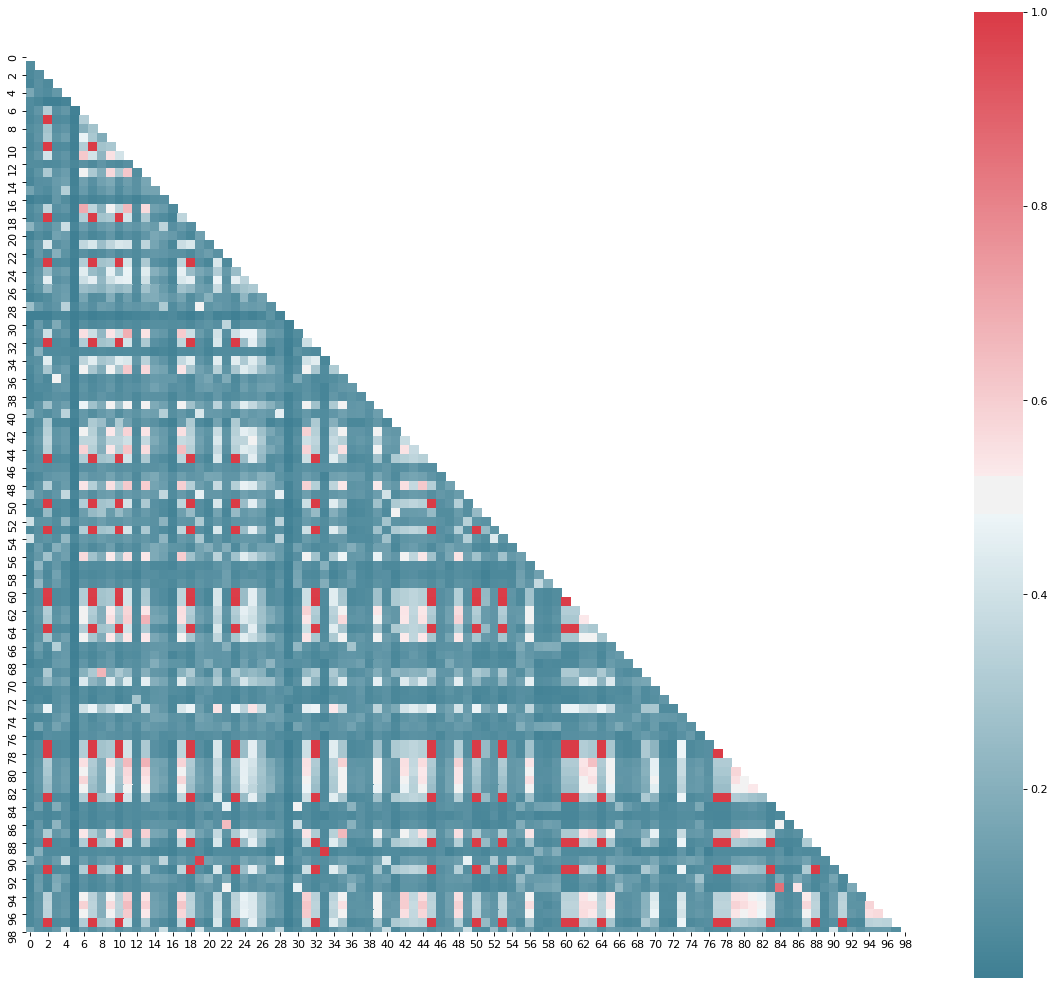

In [305]:
import seaborn as sb
import pandas as pd
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

jaccardDF = pd.DataFrame(jaccardMatrix)
# Generate a mask for the upper triangle
mask = np.zeros_like(jaccardDF, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sb.heatmap(jaccardDF, mask=mask, cmap=sb.diverging_palette(220, 10, as_cmap=True), square=True)

In [306]:
tokenID

{'ml': 1,
 'wiki': 2,
 'home': 3,
 'page': 4,
 'info': 5,
 'special': 6,
 'pages': 7,
 'printable': 8,
 'version': 9,
 'log': 10,
 'in': 11,
 'username': 12,
 'password': 13,
 'keep': 14,
 'me': 15,
 'logged': 16,
 'help': 17,
 'with': 18,
 'logging': 19,
 'forgot': 20,
 'your': 21,
 'retrieved': 22,
 'from': 23,
 'http': 24,
 'mlwiki': 25,
 'org': 26,
 'index': 27,
 'php': 28,
 'userlogin': 29,
 'by': 30,
 'alexey': 31,
 'grigorev': 32,
 'powered': 33,
 'mediawiki': 34,
 'tyrianmediawiki': 35,
 'skin': 36,
 'tyrian': 37,
 'design': 38,
 'gentoo': 39,
 'privacy': 40,
 'policy': 41,
 'about': 42,
 'disclaimers': 43,
 'if': 44,
 'window': 45,
 'jquery': 46,
 'ready': 47,
 'mw': 48,
 'loader': 49,
 'state': 50,
 'skins': 51,
 'loading': 52,
 'document': 53,
 'write': 54,
 'u': 55,
 'cscript': 56,
 'src': 57,
 'load': 58,
 'debug': 59,
 'false': 60,
 'amp': 61,
 'lang': 62,
 'en': 63,
 'modules': 64,
 'only': 65,
 'scripts': 66,
 'e': 67,
 'c': 68,
 'script': 69,
 'common': 70,
 'js': 71,


In [307]:
wordDocMatrix = np.zeros((len(tokenID), 100))

for i in range(100):
    for word in tokenFrequencies[i].keys():
        wordDocMatrix[tokenID[word]-1, i] = 1
        
wordDocMatrix

array([[1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [309]:
import random
permutation = []
i = 1
while i <= 20:
  permutation.append(random.sample(range(0, len(wordDocMatrix)), len(wordDocMatrix)))
  i = i + 1

print(permutation)

[[2824, 8210, 9214, 10417, 13301, 4228, 12221, 4953, 1898, 4358, 11702, 12140, 12973, 654, 4585, 12339, 6646, 752, 5475, 5500, 7103, 7940, 5334, 13483, 1674, 1079, 13285, 3936, 4401, 8867, 2701, 4128, 13453, 3272, 3543, 7630, 3285, 11352, 5712, 5648, 10039, 3159, 12068, 3352, 7611, 5418, 10314, 3690, 11976, 1713, 11318, 12650, 13500, 5204, 6683, 9672, 3278, 10756, 10532, 11048, 9761, 4245, 11412, 7778, 6388, 6100, 2453, 1201, 1715, 1866, 12588, 3752, 9372, 7637, 5396, 9019, 10253, 5198, 4857, 1399, 1558, 6273, 148, 10936, 12259, 255, 8387, 3871, 5761, 6524, 12964, 7270, 2791, 6010, 4212, 9483, 10332, 3454, 5831, 7280, 10578, 4516, 12999, 11220, 6817, 11443, 3902, 7406, 6702, 995, 347, 2384, 2247, 1975, 7824, 959, 983, 8397, 544, 9386, 10977, 4490, 8845, 12401, 2123, 9108, 2261, 8039, 588, 985, 3652, 469, 8872, 8983, 2801, 8537, 7320, 2702, 9603, 5978, 6190, 13413, 3916, 3118, 13182, 8093, 192, 863, 6663, 7503, 5690, 13161, 5023, 9810, 9325, 12380, 6301, 4416, 11330, 11824, 10331, 619, 

# 20 permutations on the rows and for each permutation and finding  the signature of the documents

In [310]:
signature = []
no_permutation = 0
s = len(wordDocMatrix[0])
rang_e = len(wordDocMatrix) - 1
while no_permutation < 20:
  arr = np.zeros((s,), dtype = int)
  arr = arr.tolist()
  temp = permutation[no_permutation]
  i = 0
  while i <= rang_e:
    index = 0
    while temp[index] != i:
      index = index + 1 
    j = 0
    while j < s:
      if wordDocMatrix[index][j] == 1 and arr[j] == 0:
        arr[j] = i + 1
      j = j + 1
    i = i + 1
  no_permutation = no_permutation + 1
  signature.append(arr)
print(signature)
   

[[149, 193, 193, 3, 12, 6, 29, 193, 158, 28, 193, 29, 55, 12, 28, 28, 12, 29, 193, 12, 2, 53, 25, 193, 29, 193, 1, 5, 39, 1, 25, 29, 193, 348, 165, 29, 3, 2, 25, 5, 52, 158, 29, 32, 29, 193, 91, 19, 29, 43, 193, 158, 149, 193, 139, 22, 28, 29, 348, 28, 193, 193, 5, 15, 193, 29, 10, 28, 14, 93, 5, 6, 10, 119, 14, 25, 49, 193, 193, 29, 29, 10, 29, 193, 25, 61, 25, 28, 193, 348, 12, 193, 25, 25, 29, 29, 29, 193, 10, 52], [283, 68, 151, 34, 8, 685, 68, 151, 98, 13, 151, 68, 12, 68, 1, 7, 2, 68, 151, 10, 18, 93, 26, 151, 33, 47, 70, 1, 1, 1, 63, 68, 151, 439, 113, 68, 18, 29, 94, 42, 8, 113, 16, 68, 68, 151, 111, 27, 68, 7, 151, 95, 70, 151, 1, 7, 68, 69, 70, 69, 151, 151, 68, 68, 151, 68, 69, 9, 6, 98, 13, 9, 11, 113, 1, 110, 3, 151, 151, 68, 68, 68, 68, 151, 18, 35, 63, 66, 151, 439, 10, 151, 23, 18, 68, 68, 16, 151, 8, 7], [9, 9, 194, 9, 9, 265, 17, 194, 194, 9, 194, 17, 35, 9, 9, 9, 10, 17, 194, 9, 9, 191, 9, 194, 17, 16, 9, 7, 9, 1, 15, 16, 194, 205, 9, 17, 13, 7, 74, 17, 9, 194, 16, 1

In [311]:
import pandas as pd
df = pd.DataFrame(signature)
df

0    1    2   3    4    5    6    7    8    9   ...  90   91  92   93  \
0   149  193  193   3   12    6   29  193  158   28  ...  12  193  25   25   
1   283   68  151  34    8  685   68  151   98   13  ...  10  151  23   18   
2     9    9  194   9    9  265   17  194  194    9  ...   9  194   9    9   
3   100  140  198   3   73   71  187  198   78   79  ...  27  198  10    6   
4   435  132  185  24   25   14   66  185   32   66  ...   2  185   1   13   
5     6    6   85   6    5  113    5   85   25    5  ...   5   85   6    6   
6   205  149  118  23   14  252  232  118  118   94  ...  14  118  57   20   
7   390    8  259   8   10  596   65  259   11   65  ...  85  259   1    8   
8    36   18   95  18   16  225    4   95   97    4  ...  16   95  16   86   
9     7  193  174  23    7  318  107  174  137   55  ...  15  174  45  136   
10  130   79  153   5   44    4  153  153  195   10  ...  65  153  65   21   
11  222  210   69  12    2   77   69   69   18   16  ...  25   69  25   25   
12   26   28   32  28   26   28   32   32   32   32  ...  26   32  28   25   
13   27   19   63  19    3  556   63   63   63   63  ...  22   63  10   79   
14    2   72   60  15    2  524   44   60   60   44  ...   2   60  10   13   
15  127   76   66   3   32   90   76   66   72   76  ...  32   66  35   39   
16   25   35   34  18   25  128   34   34   34   34  ...  25   34  20   34   
17   80   11   34  11   21  961   34   34   34   34  ...  65   34  11    8   
18   92   37   37   2   36   92  129   37  241    7  ...   7   37   7    7   
19  121  126  408  11  126  680   12  408  126  126  ...  73  408  24  126   

     94   95   96   97   98  99  
0    29   29   29  193   10  52  
1    68   68   16  151    8   7  
2    17   17   17  194    9   4  
3    98   98  144  198    3  33  
4    66   66   27  185  185   2  
5     5    5    5   85    5   5  
6   179    5   40  118   14   2  
7     1   65   65  259    1   1  
8     4    4    4   95   16  16  
9    56  143  170  174   18   7  
10   10  153   95  153   22  22  
11   69   13   69   69    3  17  
12   15   32   32   32   26  26  
13   63   63   63   63   22  17  
14   60   60   60   60    2   2  
15   76   76   89   66    5  26  
16   34   34   34   34   19  25  
17   34   34    8   34   65  28  
18    7    7    7   37   30   7  
19  126  126   14  408   39  73  

[20 rows x 100 columns]

# Applying Jaccard similarity on the signatures.

In [331]:
jaccardMatrixB = np.zeros((100, 100))
jaccardF = df.corr()
for i in range(100):
    for j in range(100):
        total = 40
        common = 0
        for k in range(0,20):
            for l in range(0,20):
                if df[k][i] == df[l][j]:
                    common+=1
    jaccardMatrixB[i][j] = common/total




using correlation function  given in tutorial  sheet .we are using jaccardF 

In [346]:
print(jaccardF)

          0         1         2         3         4         5         6   \
0   1.000000  0.268718  0.369252  0.151068  0.003941  0.028487  0.221660   
1   0.268718  1.000000  0.317846  0.024989  0.154570 -0.297873  0.392177   
2   0.369252  0.317846  1.000000 -0.121099  0.595853  0.194452 -0.010041   
3   0.151068  0.024989 -0.121099  1.000000 -0.275768  0.232351 -0.049372   
4   0.003941  0.154570  0.595853 -0.275768  1.000000  0.046689  0.111081   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.077518  0.300297  0.514614 -0.013910  0.483122  0.133748  0.245499   
96 -0.059323  0.477765  0.109442 -0.102425  0.044253 -0.189101  0.522343   
97  0.369252  0.317846  1.000000 -0.121099  0.595853  0.194452 -0.010041   
98  0.461208  0.081424  0.100689  0.260568  0.131428 -0.041191 -0.068029   
99 -0.161186  0.272507  0.423295 -0.292632  0.730460  0.056843 -0.216846   

          7         8         9   ...        90        91        92        93  \
0   0.

# Seaborn 

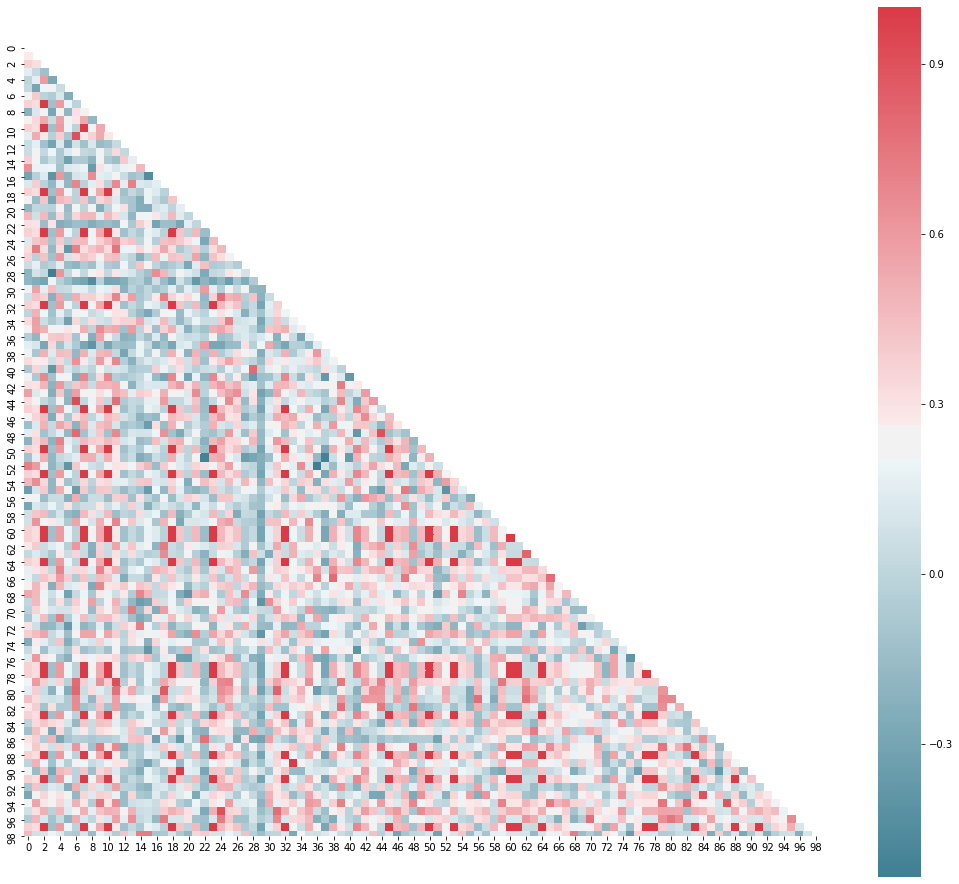

In [347]:
f, ax = plt.subplots(figsize=(18, 16))
mask = np.zeros_like(jaccardF, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sb.heatmap(jaccardF, mask=mask, cmap=sb.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

# Pagerank computation

## Computing page ranks on the basis of in degree 

We have printed the results in sorted order for top 100 nodes.

In [313]:
topInDegLinks = sorted(inDeg.items(), key=lambda x:-x[1])[:100]

for x in topInDegLinks:
     print(reverseMapping[x[0]] + ": ", x[1])

https://www.tutorialspoint.com/upsc_ias_exams.htm:  307
https://www.tutorialspoint.com/index.htm:  275
https://www.tutorialspoint.com/tutorialslibrary.htm:  177
https://www.tutorialspoint.com/videotutorials/index.php:  171
https://store.tutorialspoint.com:  171
https://www.tutorialspoint.com/questions_and_answers.htm:  170
https://www.twitter.com/tutorialspoint:  136
https://www.tutorialspoint.com/multi_language_tutorials.htm:  116
https://www.tutorialspoint.com/about/about_careers.htm:  109
https://www.tutorialspoint.com/netmeeting.php:  106
https://www.tutorialspoint.com/about/contact_us.htm:  105
https://www.youtube.com/channel/UCVLbzhxVTiTLiVKeGV7WEBg:  104
https://www.facebook.com/tutorialspointindia:  101
https://www.tutorialspoint.com/online_dev_tools.htm:  99
https://www.tutorialspoint.com/about/index.htm:  99
https://www.tutorialspoint.com/whiteboard.htm:  98
https://www.tutorialspoint.com/about/about_terms_of_use.htm:  97
https://www.tutorialspoint.com/questions/index.php:  9



Here y axis has the rank of the page on the basis of indegree.
And on the x axis are the nodes in decreasing order of their ranks. 
We have sorted to show how the rank falls.

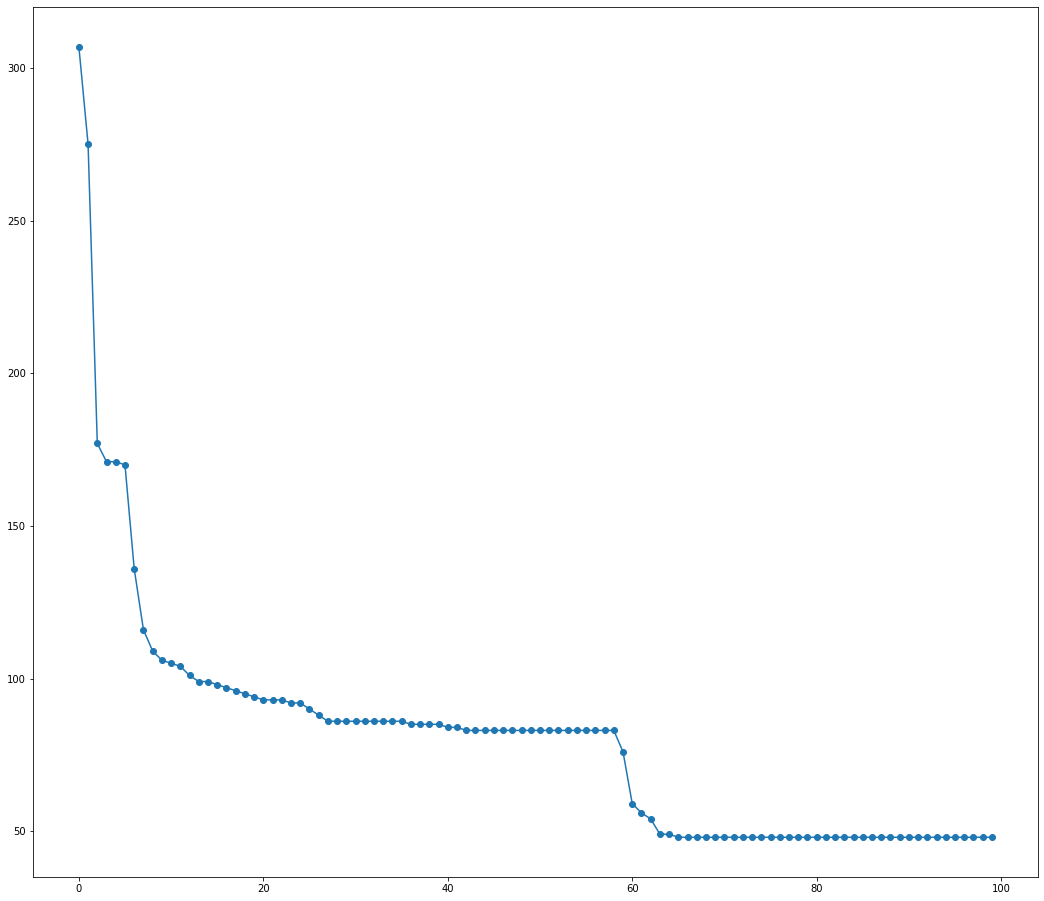

In [314]:
inDegrees = []
for x in topInDegLinks:
    inDegrees.append(x[1])
    
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(inDegrees, '-o')

## Implementing iterative page rank method (number of iterations  3)
Also actualranks have been printed with implementation only.

In [315]:
pageRank = {}

cntPages = len(linkID)

for x in range(cntPages):
    pageRank[x+1] = 1.0/cntPages
    
def iteration(pageRank):
    newRank = {}
    
    cntPages = len(linkID)
    for x in range(cntPages):
        newRank[x+1] = 0
        
    for (u, v) in network:
        newRank[v] += pageRank[u]/outDeg[u]
        
    return newRank

pageRank = iteration(pageRank)  #first iteration
pageRank = iteration(pageRank)  #second iteration
pageRank = iteration(pageRank)   #third iteration

sortedRanks = sorted(pageRank.items(), key=lambda x:-x[1])
urlRanks = dict()

for i in range(len(sortedRanks)):
    urlRanks[sortedRanks[i][0]] = i+1

scoreScaled = dict()
for x in sortedRanks:
    scoreScaled[x[0]] = (x[1]/sortedRanks[0][1])
    
topInDegLinks = sorted(pageRank.items(), key=lambda x:-x[1])[:100]

for x in topInDegLinks:
     print(reverseMapping[x[0]] + ": ", x[1])

http://www.tutorialspoint.com/:  0.00016429564004052808
https://www.youtube.com/channel/UCVLbzhxVTiTLiVKeGV7WEBg:  6.11638646438068e-05
https://www.tutorialspoint.com/about/about_careers.htm:  5.9515177518223024e-05
https://www.tutorialspoint.com/online_dev_tools.htm:  5.9515177518223024e-05
https://www.tutorialspoint.com/whiteboard.htm:  5.9515177518223024e-05
https://www.tutorialspoint.com/netmeeting.php:  5.9515177518223024e-05
https://www.facebook.com/tutorialspointindia:  5.9515177518223024e-05
https://www.tutorialspoint.com/questions/index.php:  5.9515177518223024e-05
https://www.tutorialspoint.com/about/contact_us.htm:  5.892466042945412e-05
https://www.twitter.com/tutorialspoint:  5.804010973092989e-05
https://www.linkedin.com/company/tutorialspoint:  5.75423965978966e-05
https://www.tutorialspoint.com/developers_best_practices/index.htm:  5.240820812775691e-05
https://www.tutorialspoint.com/effective_resume_writing.htm:  5.240820812775691e-05
https://www.tutorialspoint.com/com

As due to change in the factor of 1/number of nodes , the actual rank scores vary a lot in 2 parts.
We have normalised the ranks to compare the results with the part c.
Graph for this part after normalising the page ranks from 0 to 1.


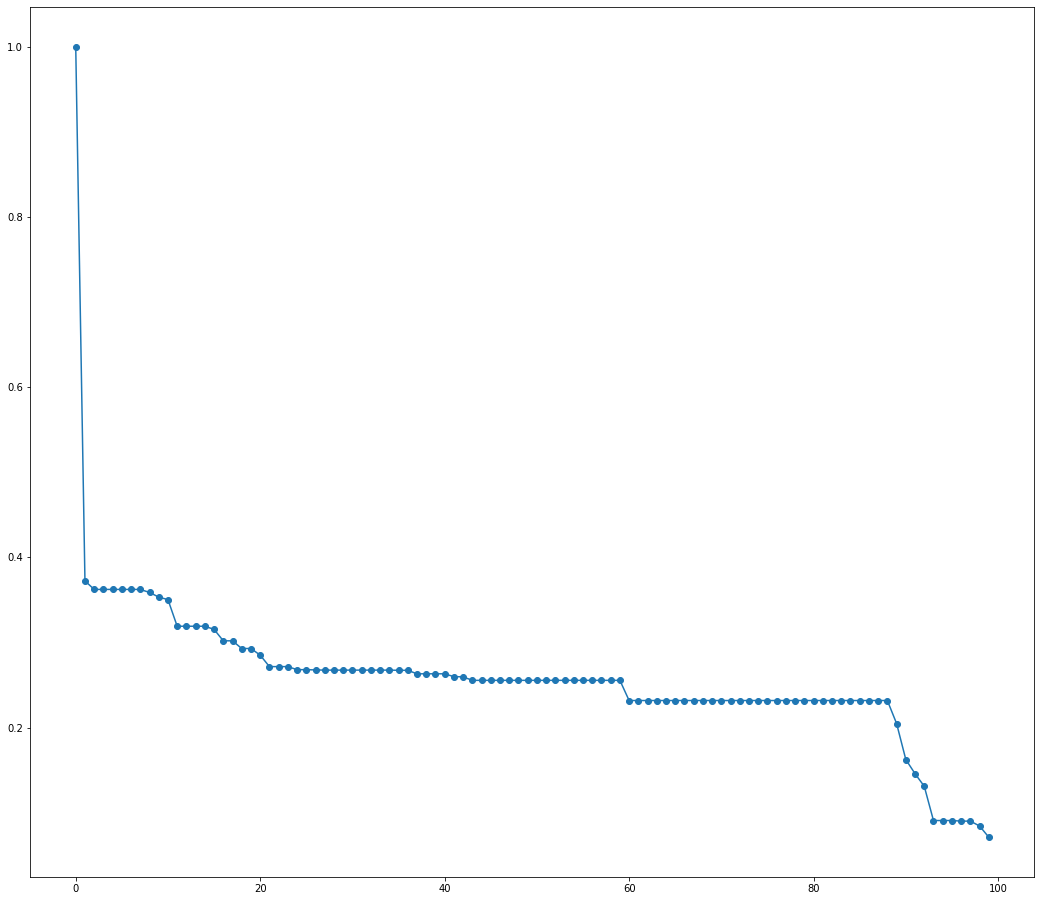

In [316]:
inDegreesScaled = []
for x in topInDegLinks:
    inDegreesScaled.append(x[1]/topInDegLinks[0][1])
    
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(inDegreesScaled, '-o')

# Computation of pagerank after removing nodes with no out going edges

In [317]:
newPageRank = {}

nonSinkPages = set()

for x in linkID.values():
    if x in outDeg.keys():
        nonSinkPages.add(x)

cntPages = len(nonSinkPages)

newOutDeg = {}

for x in nonSinkPages:
    newPageRank[x] = 1.0/cntPages
    newOutDeg[x] = 0
    
newNetwork = []

for (u, v) in network:
    if v in nonSinkPages:
        newNetwork.append((u, v))
        newOutDeg[u] += 1
    
def iteration(pageRank):
    newRank = {}
    cntPages = len(nonSinkPages)
    
    for x in nonSinkPages:
        newRank[x] = 0
        
    for (u, v) in newNetwork:
        newRank[v] += newPageRank[u]/newOutDeg[u]
        
    return newRank

newPageRank = iteration(newPageRank)  #first iteration
newPageRank = iteration(newPageRank)  #second iteration
newPageRank = iteration(newPageRank)  #third iteration

newTopInDegLinks = sorted(newPageRank.items(), key=lambda x:-x[1])[:100]

newSortedRanks = sorted(newPageRank.items(), key=lambda x:-x[1])
newUrlRanks = dict()

for i in range(len(newSortedRanks)):
    newUrlRanks[newSortedRanks[i][0]] = i+1
    
newScoreScaled = dict()
for x in newSortedRanks:
    newScoreScaled[x[0]] = (x[1]/newSortedRanks[0][1])
    
for x in newTopInDegLinks:
     print(reverseMapping[x[0]] + ": ", x[1])

https://www.youtube.com/channel/UCVLbzhxVTiTLiVKeGV7WEBg:  0.04224229249601069
https://www.twitter.com/tutorialspoint:  0.04026966089105567
https://github.com/alexeygrigorev/TyrianMediawiki-Skin:  0.03111544776250278
https://www.gentoo.org/:  0.03111544776250278
https://www.tutorialspoint.com/index.htm:  0.014389734453784983
https://www.tutorialspoint.com/about/about_careers.htm:  0.012225663843394585
https://www.tutorialspoint.com/online_dev_tools.htm:  0.012225663843394585
https://www.tutorialspoint.com/whiteboard.htm:  0.012225663843394585
https://www.tutorialspoint.com/netmeeting.php:  0.012225663843394585
https://www.facebook.com/tutorialspointindia:  0.012225663843394585
https://www.tutorialspoint.com/questions/index.php:  0.012225663843394585
https://www.tutorialspoint.com/about/contact_us.htm:  0.012021546335581827
https://www.tutorialspoint.com/videotutorials/index.php:  0.011840584864077545
https://www.tutorialspoint.com/developers_best_practices/index.htm:  0.009622009760449


Graph for this part after normalising the page ranks from 0 to 1 

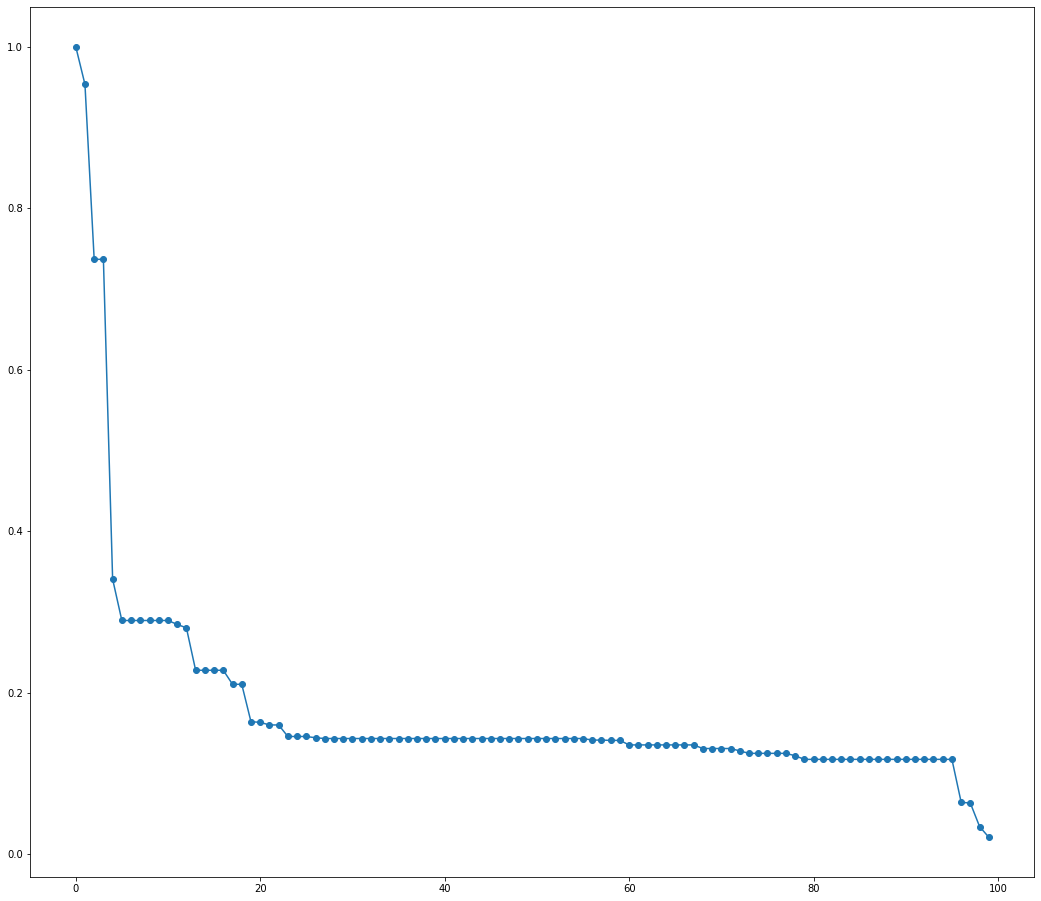

In [318]:
newInDegreesScaled = []
for x in newTopInDegLinks:
    newInDegreesScaled.append(x[1]/newTopInDegLinks[0][1])
    
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(newInDegreesScaled, '-o')

First we have shown the differece in the gradient of decrease between the two page rank . <br>
We can see that without sink nodes graph is much smoother.

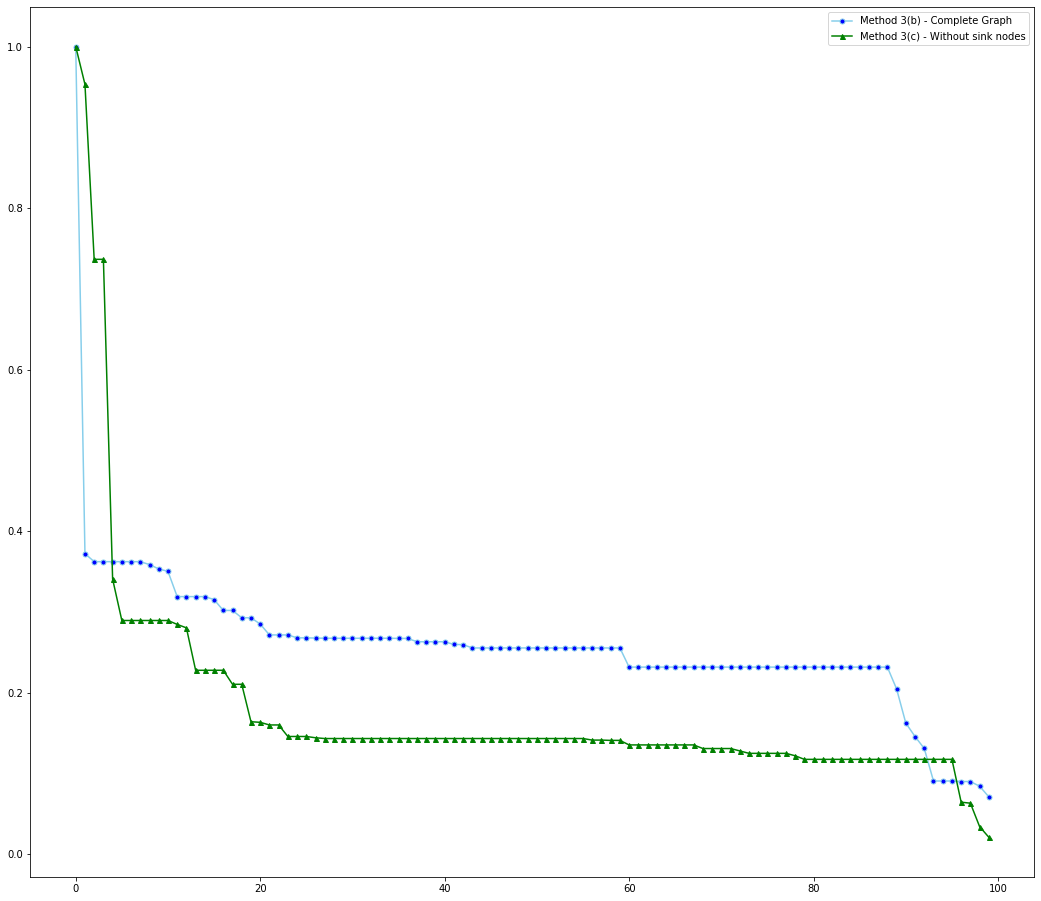

In [319]:
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(inDegreesScaled, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', label="Method 3(b) - Complete Graph")
plt.plot(newInDegreesScaled, marker='^', markerfacecolor='green', markersize=5, color='green', label="Method 3(c) - Without sink nodes")
plt.legend()

# Below : Change in pagerank scores of nodes due to removal of sink nodes .<br>
# Sorted in decreasing order of values.

In [320]:
deltaRanks = dict()

for (urlID, newScore) in newScoreScaled.items():
    oldScore = scoreScaled[urlID]
    deltaRanks[urlID] = [newScore - oldScore, oldScore, newScore]
    
sortedDelta = sorted(deltaRanks.items(), key=lambda x:-abs(x[1][0]))

topChanges = []

for (id, arr) in sortedDelta:
    topChanges.append((reverseMapping[id], arr[0], arr[1], arr[2]))

topDelta = pd.DataFrame(topChanges, columns = ['Link', 'Change in Score', 'Old Score', 'New Score'])
topDelta.head(20)

Link  Change in Score  \
0                             https://www.gentoo.org/         0.709010   
1   https://github.com/alexeygrigorev/TyrianMediaw...         0.708833   
2   https://www.youtube.com/channel/UCVLbzhxVTiTLi...         0.627721   
3              https://www.twitter.com/tutorialspoint         0.600036   
4   http://datascience.stackexchange.com/questions...         0.161617   
5                   http://www.imageclef.org/wikidata         0.144015   
6   https://www.tutorialspoint.com/devops_tutorial...        -0.137935   
7   https://www.tutorialspoint.com/digital_marketi...        -0.137935   
8   https://www.tutorialspoint.com/engineering_tut...        -0.137935   
9   https://www.tutorialspoint.com/famous_monument...        -0.137935   
10  https://www.tutorialspoint.com/mainframe_tutor...        -0.137935   
11  https://www.tutorialspoint.com/management_tuto...        -0.137935   
12  https://www.tutorialspoint.com/maths_tutorials...        -0.137935   
13  https://www.tutorialspoint.com/misc_tutorials.htm        -0.137935   
14  https://www.tutorialspoint.com/python_technolo...        -0.137935   
15   https://www.tutorialspoint.com/sap_tutorials.htm        -0.137935   
16  https://www.tutorialspoint.com/scripting_lnagu...        -0.137935   
17  https://www.tutorialspoint.com/selected_readin...        -0.137935   
18  https://www.tutorialspoint.com/software_qualit...        -0.137935   
19  https://www.tutorialspoint.com/soft_skill_tuto...        -0.137935   

    Old Score  New Score  
0    0.027584   0.736595  
1    0.027761   0.736595  
2    0.372279   1.000000  
3    0.353266   0.953302  
4    0.001711   0.163329  
5    0.000206   0.144222  
6    0.255415   0.117480  
7    0.255415   0.117480  
8    0.255415   0.117480  
9    0.255415   0.117480  
10   0.255415   0.117480  
11   0.255415   0.117480  
12   0.255415   0.117480  
13   0.255415   0.117480  
14   0.255415   0.117480  
15   0.255415   0.117480  
16   0.255415   0.117480  
17   0.255415   0.117480  
18   0.255415   0.117480  
19   0.255415   0.117480

Graoh showing the difference in page ranks(top 100)

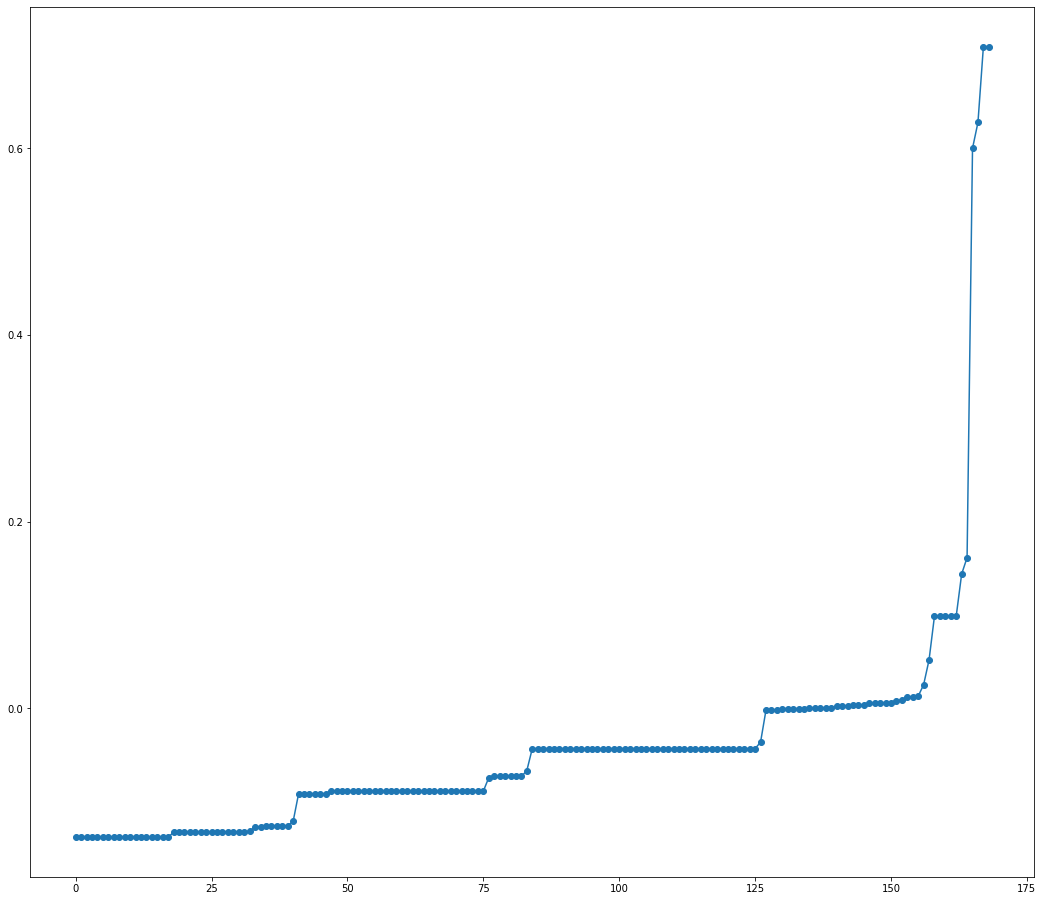

In [321]:
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(sorted(topDelta['Change in Score']), 'o-')

Removing sink nodes we basically tried to avoid Dangling links (these are links that point to any page with no outgoing links).<br>
After remove sink nodes we basically tried to avoid Dangling links (these are links that point to any page with no outgoing links).<br>
As the sink nodes have been removed other nodes will contribute more to other remaining nodes.<br>
As if A->B is removed where B is a sink node . Now A will be contributing more towards the other nodes which it was pointing earlier. Thus increasing the pageranks of rest of the pages.<br> 
Also 1 more factor to take in account is that when the number of nodes are decreased , So it resulted in decrease of the initial base value ie inversly proportional to total number of nodes.<br> 
So the base page rank (initial) of each node also increase.<br>








## Implementing Matrix Multiplication method for pagerank (number of iterations  3)

In [334]:
import numpy as np

dim = len(linkID)

pageRankColMatrix = np.array([1.0/dim]*dim).reshape(dim, 1)

squareMatrix = np.zeros([dim, dim])

for (u, v) in network:
    squareMatrix[v-1][u-1] = 1.0/outDeg[u]

cubedMatrix = squareMatrix.dot(squareMatrix) #first iteration
cubedMatrix = cubedMatrix.dot(squareMatrix) #second iteration

finalRankMatrix = cubedMatrix.dot(pageRankColMatrix) #third iteration 

#print(finalRankMatrix)

finalRankDict = dict()
for i in range(len(finalRankMatrix)):
    finalRankDict[i+1] = finalRankMatrix[i]

sortedRanks = sorted(finalRankDict.items(), key=lambda x:-x[1])
urlRanks = dict()

for i in range(len(sortedRanks)):
    urlRanks[sortedRanks[i][0]] = i+1

scoreScaled = dict()
for x in sortedRanks:
    scoreScaled[x[0]] = (x[1]/sortedRanks[0][1])

topLinksMatrix = sorted(range(len(finalRankMatrix)), key=lambda i: finalRankMatrix[i][0], reverse=True)[:10]

# print(topLinksMatrix)

for x in topLinksMatrix:
    print(reverseMapping[x+1] + ": ", finalRankMatrix[x][0])

http://www.tutorialspoint.com/:  0.00016429564004052802
https://www.youtube.com/channel/UCVLbzhxVTiTLiVKeGV7WEBg:  6.11638646438069e-05
https://www.tutorialspoint.com/about/about_careers.htm:  5.95151775182231e-05
https://www.tutorialspoint.com/online_dev_tools.htm:  5.95151775182231e-05
https://www.tutorialspoint.com/whiteboard.htm:  5.95151775182231e-05
https://www.tutorialspoint.com/netmeeting.php:  5.95151775182231e-05
https://www.facebook.com/tutorialspointindia:  5.95151775182231e-05
https://www.tutorialspoint.com/questions/index.php:  5.95151775182231e-05
https://www.tutorialspoint.com/about/contact_us.htm:  5.892466042945419e-05
https://www.twitter.com/tutorialspoint:  5.804010973092996e-05


Graph depecting different values  of pagerank for all the nodes .

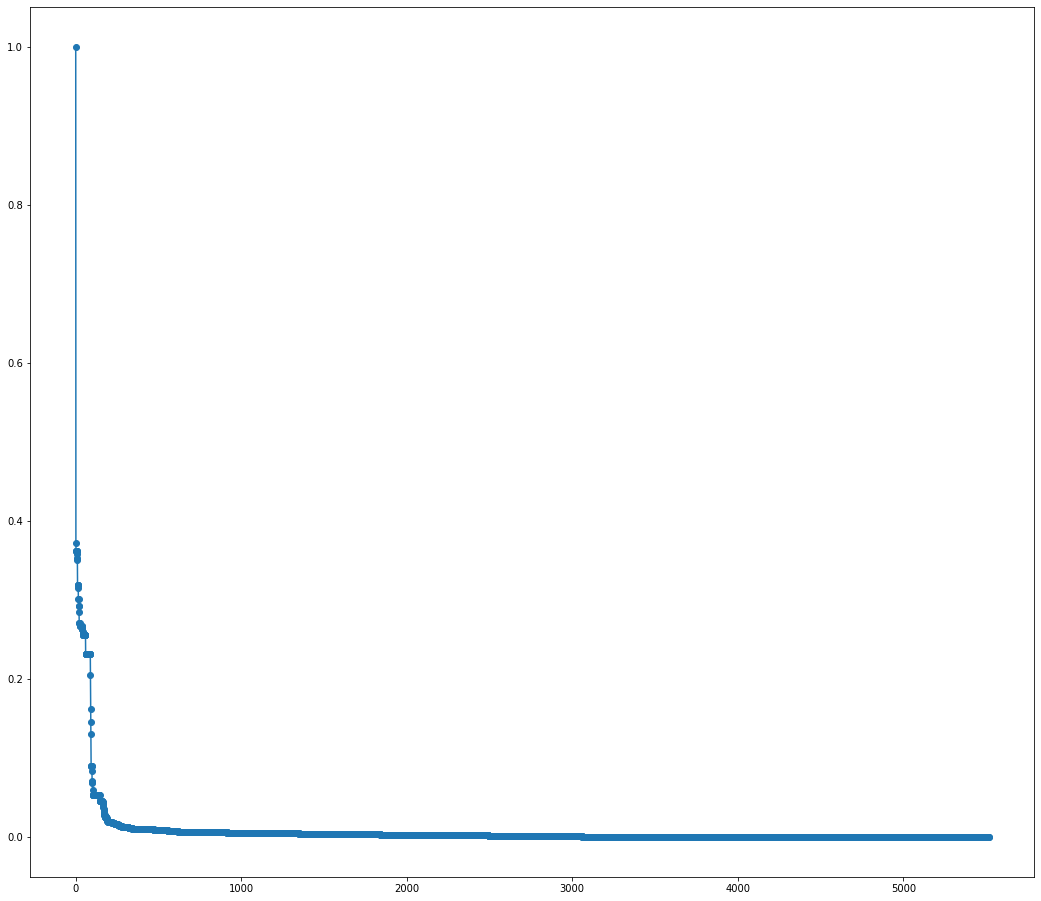

In [337]:
inDegrees = []
for x in sortedRanks:
    inDegrees.append(x[1]/sortedRanks[0][1])
    
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(inDegrees, '-o')


# after removing nodes with no out going edges 

In [338]:
import numpy as np

newDim = len(linkID)

newPageRankColMatrix = np.array([1.0/dim]*dim).reshape(dim, 1)

newSquareMatrix = np.zeros([dim, dim])

for (u, v) in newNetwork:
    newSquareMatrix[v-1][u-1] = 1.0/newOutDeg[u]

newCubedMatrix = newSquareMatrix.dot(newSquareMatrix) #first iteration
newCubedMatrix = newCubedMatrix.dot(newSquareMatrix)  #second iteration 

newFinalRankMatrix = newCubedMatrix.dot(newPageRankColMatrix) #third iteration

# print(finalRankMatrix)

newFinalRankDict = dict()
for i in range(len(newFinalRankMatrix)):
    newFinalRankDict[i+1] = newFinalRankMatrix[i]

newSortedRanks = sorted(newFinalRankDict.items(), key=lambda x:-x[1])
newUrlRanks = dict()

for i in range(len(newSortedRanks)):
    newUrlRanks[newSortedRanks[i][0]] = i+1

newScoreScaled = dict()
for x in newSortedRanks:
    newScoreScaled[x[0]] = (x[1]/newSortedRanks[0][1])


newTopLinksMatrix = sorted(range(len(newFinalRankMatrix)), key=lambda i: newFinalRankMatrix[i][0], reverse=True)[:100]




print( newFinalRankDict[linkID["http://www.tutorialspoint.com/"]])
for x in newTopLinksMatrix:
    print(reverseMapping[x+1] + ": ", newFinalRankMatrix[x][0])

[0.]
https://www.youtube.com/channel/UCVLbzhxVTiTLiVKeGV7WEBg:  0.001293756330522978
https://www.twitter.com/tutorialspoint:  0.0012333404658550918
https://github.com/alexeygrigorev/TyrianMediawiki-Skin:  0.000952974025346678
https://www.gentoo.org/:  0.000952974025346678
https://www.tutorialspoint.com/index.htm:  0.00044071495518116293
https://www.tutorialspoint.com/about/about_careers.htm:  0.00037443588066938817
https://www.tutorialspoint.com/online_dev_tools.htm:  0.00037443588066938817
https://www.tutorialspoint.com/whiteboard.htm:  0.00037443588066938817
https://www.tutorialspoint.com/netmeeting.php:  0.00037443588066938817
https://www.facebook.com/tutorialspointindia:  0.00037443588066938817
https://www.tutorialspoint.com/questions/index.php:  0.00037443588066938817
https://www.tutorialspoint.com/about/contact_us.htm:  0.00036818436584148755
https://www.tutorialspoint.com/videotutorials/index.php:  0.0003626420518356477
https://www.tutorialspoint.com/developers_best_practices/in

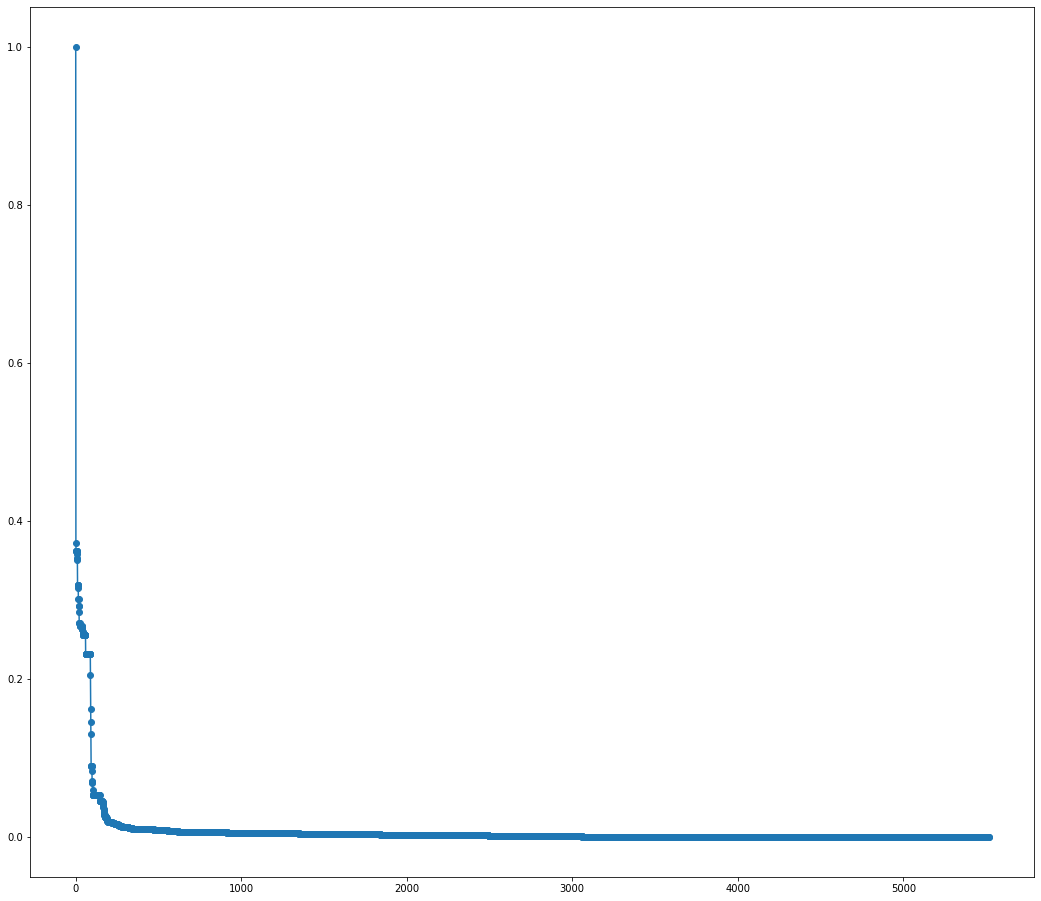

In [340]:
newInDegrees = []
for x in newSortedRanks:
    newInDegrees.append(x[1]/newSortedRanks[0][1])
    
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(inDegrees, '-o')

# Comparission with sink nodes and without sink nodes .

First we have shown the differece in the gradient of decrease between the two page rank . <br>
We can see that without sink nodes graph is much smoother.

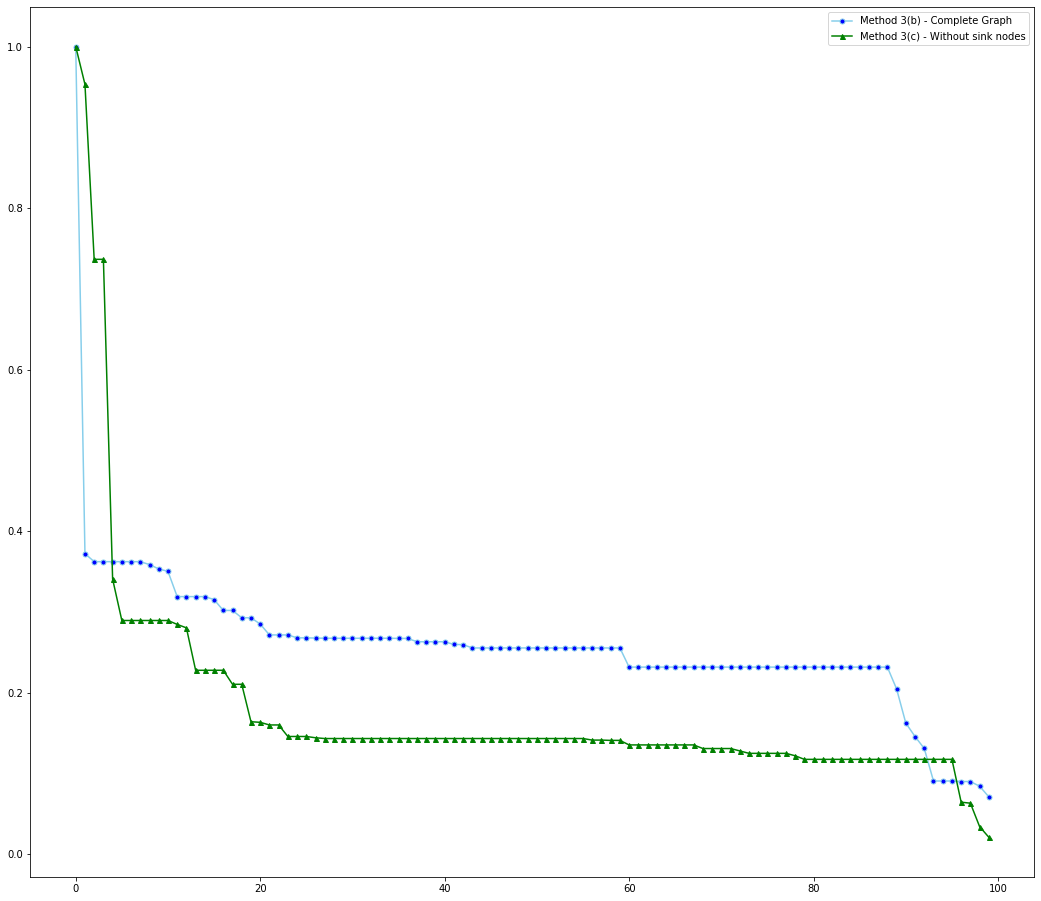

In [341]:
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(inDegreesScaled, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', label="Method 3(b) - Complete Graph")
plt.plot(newInDegreesScaled, marker='^', markerfacecolor='green', markersize=5, color='green', label="Method 3(c) - Without sink nodes")
plt.legend()

# Below : Change in pagerank scores of nodes due to removal of sink nodes .<br>
# Sorted in decreasing order of values.

In [342]:
deltaRanks = dict()

for (urlID, newScore) in newScoreScaled.items():
    oldScore = scoreScaled[urlID]
    deltaRanks[urlID] = [newScore - oldScore, oldScore, newScore]
    
sortedDelta = sorted(deltaRanks.items(), key=lambda x:-abs(x[1][0]))

topChanges = []

for (id, arr) in sortedDelta:
    if arr[1] not in [0.0,1.0] and arr[2] not in [0.0,1.0]:
        topChanges.append((reverseMapping[id], arr[0], arr[1], arr[2]))

topDelta = pd.DataFrame(topChanges, columns = ['Link', 'Change in Score', 'Old Score', 'New Score'])
topDelta.head(20)

Link         Change in Score  \
0                             https://www.gentoo.org/    [0.7090103814611111]   
1   https://github.com/alexeygrigorev/TyrianMediaw...    [0.7088332465202477]   
2              https://www.twitter.com/tutorialspoint    [0.6000356946825536]   
3   http://datascience.stackexchange.com/questions...   [0.16161739666537964]   
4                   http://www.imageclef.org/wikidata     [0.144015468845791]   
5   https://www.tutorialspoint.com/devops_tutorial...  [-0.13793513428885482]   
6   https://www.tutorialspoint.com/digital_marketi...  [-0.13793513428885482]   
7   https://www.tutorialspoint.com/engineering_tut...  [-0.13793513428885482]   
8   https://www.tutorialspoint.com/famous_monument...  [-0.13793513428885482]   
9   https://www.tutorialspoint.com/mainframe_tutor...  [-0.13793513428885482]   
10  https://www.tutorialspoint.com/management_tuto...  [-0.13793513428885482]   
11  https://www.tutorialspoint.com/maths_tutorials...  [-0.13793513428885482]   
12  https://www.tutorialspoint.com/misc_tutorials.htm  [-0.13793513428885482]   
13  https://www.tutorialspoint.com/python_technolo...  [-0.13793513428885482]   
14   https://www.tutorialspoint.com/sap_tutorials.htm  [-0.13793513428885482]   
15  https://www.tutorialspoint.com/scripting_lnagu...  [-0.13793513428885482]   
16  https://www.tutorialspoint.com/selected_readin...  [-0.13793513428885482]   
17  https://www.tutorialspoint.com/software_qualit...  [-0.13793513428885482]   
18  https://www.tutorialspoint.com/soft_skill_tuto...  [-0.13793513428885482]   
19  https://www.tutorialspoint.com/telecom_tutoria...  [-0.13793513428885482]   

                   Old Score              New Score  
0     [0.027584294726061814]   [0.7365946761871729]  
1     [0.027761429666925137]   [0.7365946761871729]  
2      [0.35326628093486095]   [0.9533019756174146]  
3     [0.001711114549140059]   [0.1633285112145197]  
4   [0.00020646293528951693]   [0.1442219317810805]  
5      [0.25541480858703614]  [0.11747967429818132]  
6      [0.25541480858703614]  [0.11747967429818132]  
7      [0.25541480858703614]  [0.11747967429818132]  
8      [0.25541480858703614]  [0.11747967429818132]  
9      [0.25541480858703614]  [0.11747967429818132]  
10     [0.25541480858703614]  [0.11747967429818132]  
11     [0.25541480858703614]  [0.11747967429818132]  
12     [0.25541480858703614]  [0.11747967429818132]  
13     [0.25541480858703614]  [0.11747967429818132]  
14     [0.25541480858703614]  [0.11747967429818132]  
15     [0.25541480858703614]  [0.11747967429818132]  
16     [0.25541480858703614]  [0.11747967429818132]  
17     [0.25541480858703614]  [0.11747967429818132]  
18     [0.25541480858703614]  [0.11747967429818132]  
19     [0.25541480858703614]  [0.11747967429818132]

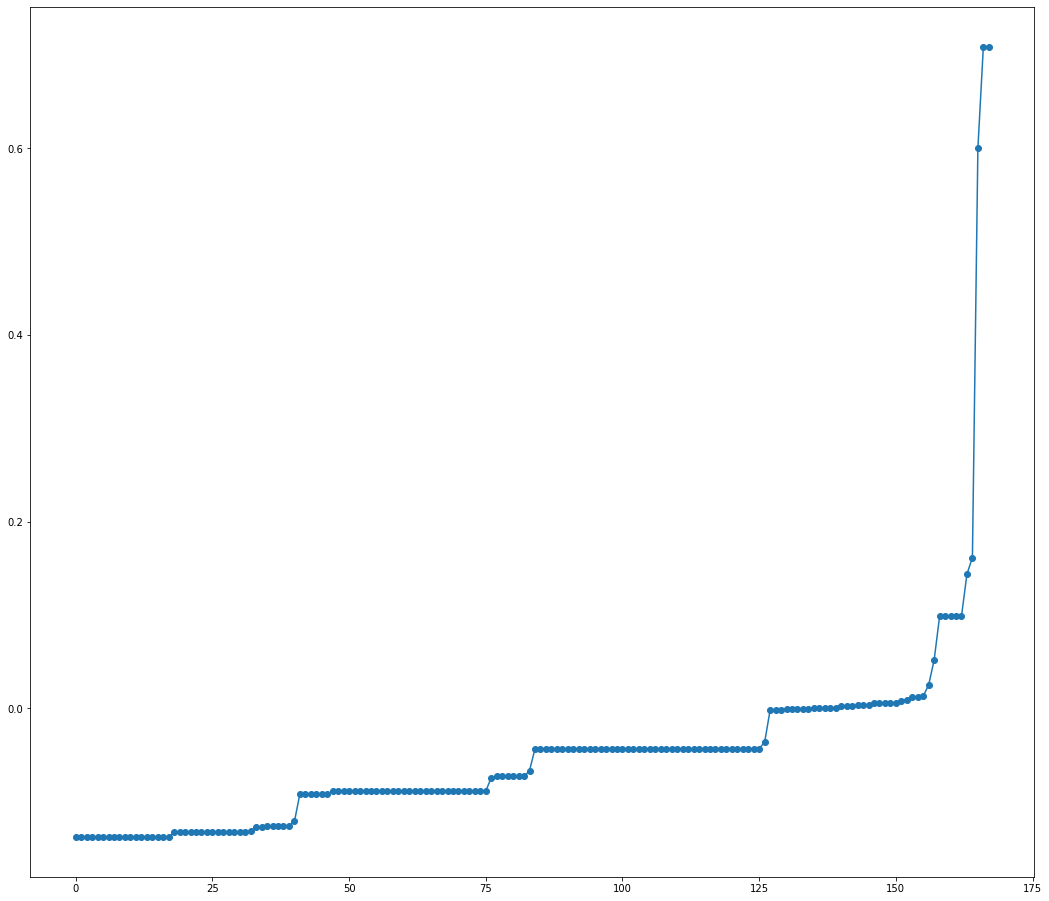

In [343]:
f, ax = plt.subplots(figsize=(18, 16))
plt.plot(sorted(topDelta['Change in Score']), 'o-')

After remove sink nodes we basically tried to avoid Dangling links (these are links that point to any page with no outgoing links).<br>
As the result scores are normalised from o  to 1 . <br>
As the sink nodes have been removed other nodes will contribute more to other remaining nodes.<br>
As if A->B is removed where B is a sink node . Now A will be contributing more towards the other nodes which it was pointing earlier. Thus increasing the pageranks of rest of the pages.<br> 
Also 1 more factor to take in account is that when the number of nodes are decreased , So it resulted in decrease of the initial base value ie inversly proportional to total number of nodes.<br> 
So the base page rank (initial) of each node also increase.<br>




# END 